# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [8]:
!pip install pymongo

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.9/500.9 KB 9.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 KB 8.5 MB/s eta 0:00:00
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [9]:
!pip install pymongo[srv]

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [10]:
!pip install dnspython

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 KB 18.2 MB/s eta 0:00:00
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [12]:
!pip install twitter

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 KB 8.2 MB/s eta 0:00:00
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [14]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [15]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [16]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [ ]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [46]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [56]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,500mi" # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [57]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 07 20:02:12 +0000 2022'
'Mon Nov 07 20:02:12 +0000 2022'
'Mon Nov 07 20:02:11 +0000 2022'
'Mon Nov 07 20:02:10 +0000 2022'
'Mon Nov 07 20:02:09 +0000 2022'
'Mon Nov 07 20:02:08 +0000 2022'
'Mon Nov 07 20:02:07 +0000 2022'
'Mon Nov 07 20:02:06 +0000 2022'
'Mon Nov 07 20:02:03 +0000 2022'
'Mon Nov 07 20:02:02 +0000 2022'
'Mon Nov 07 20:02:02 +0000 2022'
'Mon Nov 07 20:02:02 +0000 2022'
'Mon Nov 07 20:02:02 +0000 2022'
'Mon Nov 07 20:02:01 +0000 2022'
'Mon Nov 07 20:01:59 +0000 2022'
'Mon Nov 07 20:01:59 +0000 2022'
'Mon Nov 07 20:01:58 +0000 2022'
'Mon Nov 07 20:01:57 +0000 2022'
'Mon Nov 07 20:01:55 +0000 2022'
'Mon Nov 07 20:01:54 +0000 2022'
'Mon Nov 07 20:01:53 +0000 2022'
'Mon Nov 07 20:01:53 +0000 2022'
'Mon Nov 07 20:01:53 +0000 2022'
'Mon Nov 07 20:01:52 +0000 2022'
'Mon Nov 07 20:01:50 +0000 2022'
'Mon Nov 07 20:01:49 +0000 2022'
'Mon Nov 07 20:01:49 +0000 2022'
'Mon Nov 07 20:01:48 +0000 2022'
'Mon Nov 07 20:01:48 +0000 2022'
'Mon Nov 07 20:01:47 +0000 2022'
'Mon Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [58]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 07 20:00:30 +0000 2022'
'Mon Nov 07 20:00:29 +0000 2022'
'Mon Nov 07 20:00:28 +0000 2022'
'Mon Nov 07 20:00:27 +0000 2022'
'Mon Nov 07 20:00:26 +0000 2022'
'Mon Nov 07 20:00:26 +0000 2022'
'Mon Nov 07 20:00:24 +0000 2022'
'Mon Nov 07 20:00:23 +0000 2022'
'Mon Nov 07 20:00:23 +0000 2022'
'Mon Nov 07 20:00:23 +0000 2022'
'Mon Nov 07 20:00:22 +0000 2022'
'Mon Nov 07 20:00:21 +0000 2022'
'Mon Nov 07 20:00:21 +0000 2022'
'Mon Nov 07 20:00:19 +0000 2022'
'Mon Nov 07 20:00:17 +0000 2022'
'Mon Nov 07 20:00:15 +0000 2022'
'Mon Nov 07 20:00:14 +0000 2022'
'Mon Nov 07 20:00:14 +0000 2022'
'Mon Nov 07 20:00:13 +0000 2022'
'Mon Nov 07 20:00:13 +0000 2022'
'Mon Nov 07 20:00:13 +0000 2022'
'Mon Nov 07 20:00:12 +0000 2022'
'Mon Nov 07 20:00:12 +0000 2022'
'Mon Nov 07 20:00:12 +0000 2022'
'Mon Nov 07 20:00:12 +0000 2022'
'Mon Nov 07 20:00:12 +0000 2022'
'Mon Nov 07 20:00:10 +0000 2022'
'Mon Nov 07 20:00:09 +0000 2022'
'Mon Nov 07 20:00:08 +0000 2022'
'Mon Nov 07 20:00:08 +0000 2022'
'Mon Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

14133
11028


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


OperationFailure: Index already exists with a different name: text_text, full error: {'ok': 0.0, 'errmsg': 'Index already exists with a different name: text_text', 'code': 85, 'codeName': 'IndexOptionsConflict', '$clusterTime': {'clusterTime': Timestamp(1668024282, 19), 'signature': {'hash': b'\xca0\x92\xb1F\xd9\x8c\x03M"(/Kb9\x9bn\xa6\xd4\x04', 'keyId': 7127373055185125394}}, 'operationTime': Timestamp(1668024282, 19)}

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Advancement Project
text: You can report intimidation to the Election Protection Hotline: 1-866-OUR-VOTE

Okay now VOTE VOTE VOTE.
----
name: DiversityBizBlog
text: Remember to Vote!
#vote #voting #election #elections #votes #everyvotecounts #electionday #democracy #govote… https://t.co/wlACtEwHYj
----
name: Abator Info Services
text: Remember to Vote!
#vote #voting #election #elections #votes #everyvotecounts #electionday #democracy #govote… https://t.co/89LOpYKG7f
----
name: T. Johansson
text: @ewarren Vote for lower costs for families -- vote for fiscal responsibility.

Vote for democracy -- vote for Voter… https://t.co/pya2mQqVvG
----
name: Rene
text: @RepMTG Vote the crazy out of our house !!!! Please Georgia ... Vote .. Vote Marcus Flowers ...Not 1 vote should go… https://t.co/HTKQYkogLf
----
name: ✰ Katie ✰
text: IF YOU HAVE NOT VOTED GO VOTE! TOMORROW IS ELECTION DAY! PLEASE DO NOT MAKE THE MISTAKE OF THINKING YOUR VOTE DOESNT COUNT!
----
name: Robin Osborne 🇺🇸 Kyblu

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,636963bad63212cc3f063b3f,Mon Nov 07 17:15:31 +0000 2022,1589667878122332160,1589667878122332160,You can report intimidation to the Election Pr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.589668e+18,...,2,2,False,False,en,NaN,NaN,NaN,NaN,NaN
1,636963ebd63212cc3f0644d3,Mon Nov 07 16:20:42 +0000 2022,1589654085078159361,1589654085078159361,Remember to Vote!\n#vote #voting #election #el...,True,"{'hashtags': [{'text': 'vote', 'indices': [18,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,1,False,False,en,False,NaN,NaN,NaN,NaN
2,636963ead63212cc3f0644b9,Mon Nov 07 16:21:19 +0000 2022,1589654237486919682,1589654237486919682,Remember to Vote!\n#vote #voting #election #el...,True,"{'hashtags': [{'text': 'vote', 'indices': [18,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
3,636961bdd63212cc3f061ef2,Mon Nov 07 19:46:24 +0000 2022,1589705850675134469,1589705850675134469,@ewarren Vote for lower costs for families -- ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.589691e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,63696419d63212cc3f064e13,Mon Nov 07 15:30:05 +0000 2022,1589641346037747712,1589641346037747712,@RepMTG Vote the crazy out of our house !!!! P...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.589428e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
5,6369637cd63212cc3f062f01,Mon Nov 07 18:26:29 +0000 2022,1589685736697081856,1589685736697081856,IF YOU HAVE NOT VOTED GO VOTE! TOMORROW IS ELE...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6,7,False,False,en,NaN,NaN,NaN,NaN,NaN
6,636963c4d63212cc3f063d14,Mon Nov 07 17:05:03 +0000 2022,1589665246179782658,1589665246179782658,I was very ill and didn't vote when Bevin was ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,2,False,False,en,False,1.589640e+18,1589640311743336448,{'created_at': 'Mon Nov 07 15:25:59 +0000 2022...,NaN
7,63696397d63212cc3f06343e,Mon Nov 07 17:56:10 +0000 2022,1589678107942088705,1589678107942088705,Tomorrow is the last day to vote here in GA fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,1,False,False,en,NaN,NaN,NaN,NaN,NaN
8,6369642ad63212cc3f065150,Mon Nov 07 15:10:24 +0000 2022,1589636391906205701,1589636391906205701,The election is TOMORROW!\nWhat’s your vote pl...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
9,636963fbd63212cc3f064820,Mon Nov 07 16:01:58 +0000 2022,1589649367929352192,1589649367929352192,Good morning to everyone who has already voted...,False,"{'hashtags': [{'text': 'Vote', 'indices': [102...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,2,False,False,en,False,NaN,NaN,NaN,"{'media': [{'id': 1589649360467394561, 'id_str..."


<AxesSubplot:>

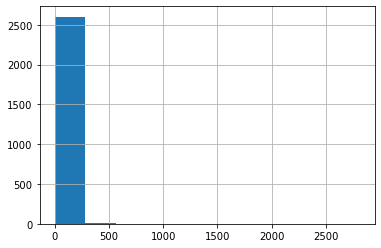

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count